# Test TPC Dataset API

In [1]:
import plotly
import plotly.graph_objs as go
import plotly.io as pio

In [2]:
from torch_geometric.loader import DataLoader

In [3]:
from tpc_dataset import TPCDataset

In [4]:
data_root = './data/pp100evt_2/'
dataset = TPCDataset(data_root)

load 100 from data/pp100evt_2


## Plot the TPC data

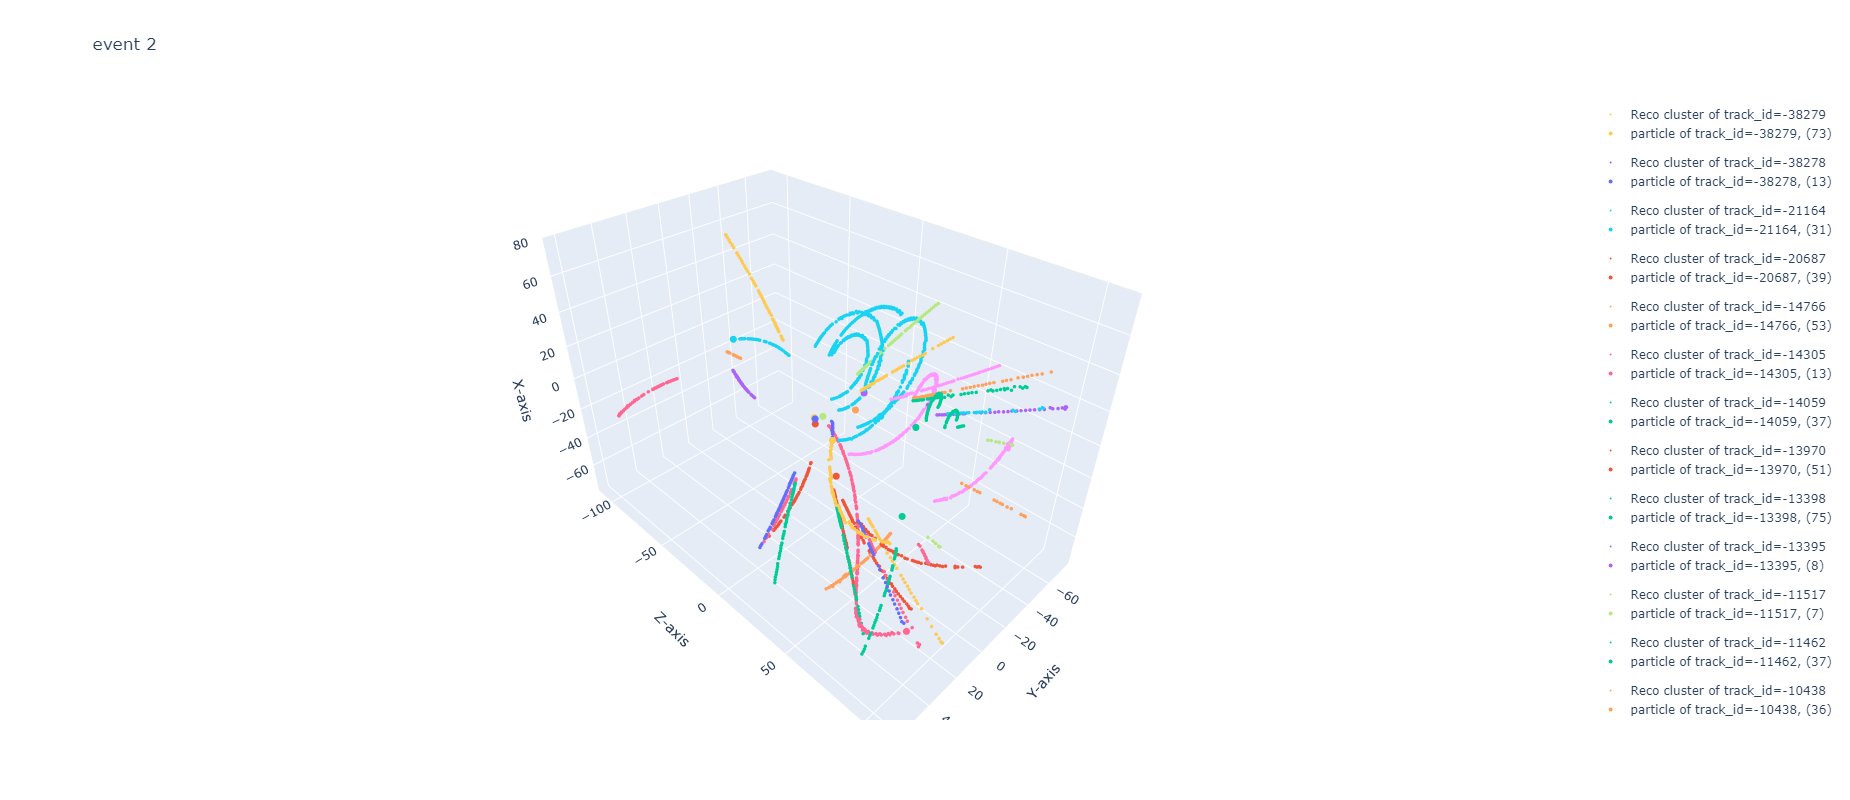

In [8]:
event_id = 2
data = dataset[event_id]

features = data['features'].x
seg_target = data['seg_target'].x
reg_target = data['reg_target'].x
track_ids = seg_target.unique()

color_cycle = pio.templates['plotly'].layout.colorway

fig = go.Figure()
for color_idx, idx in enumerate(track_ids):

    curve_sel = features[seg_target == idx]
    particle_sel = reg_target[seg_target == idx]
    
    if len(curve_sel) < 5:
        # print(df_sel.pid.unique(), len(df_sel))
        continue
    
    trace_tpc = go.Scatter3d(
        x=curve_sel[:, 1].numpy(), # x-coords
        y=curve_sel[:, 2].numpy(), # y-coords
        z=curve_sel[:, 3].numpy(), # z-coords, 0 is Energy
        mode='markers',
        # text=labels,
        # textposition='top center',
        legendgroup=str(idx),
        marker=dict(size=2, opacity=1, color=color_cycle[color_idx % len(color_cycle)]),
        name=f'Reco cluster of track_id={idx}'
    )
    fig.add_trace(trace_tpc)
    
    trace_particle = go.Scatter3d(
        x=particle_sel[0, 3].numpy(), # x-vertex
        y=particle_sel[0, 4].numpy(), # y-vertex
        z=particle_sel[0, 5].numpy(), # z-vertex, 0-2 are momentum, 6 is energy
        mode='markers',
        # text=labels,
        # textposition='top center',
        legendgroup=str(idx),
        marker=dict(size=4, color=color_cycle[color_idx % len(color_cycle)]),#, symbol='square'),
        name=f'particle of track_id={idx}, ({len(curve_sel)})',
    )
    
    fig.add_trace(trace_particle)

camera = dict(
    up=dict(x=1, y=0, z=0),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.25, y=1.25, z=1.25)
)
fig.update_layout(
    title=f"event {event_id}", 
    scene=dict(
        xaxis=dict(title="X-axis"),
        yaxis=dict(title="Y-axis"),
        zaxis=dict(title="Z-axis")
    ),
    showlegend=True,
    width=1200, 
    height=800,
    scene_camera=camera,
)


fig.show()

# fig.write_html('g4hit.html')

## Test torch_geometric DataLoader

In [7]:
loader = DataLoader(dataset, batch_size=4)

print(f'number of bathes: {len(loader)}')

for batch_idx, batch in enumerate(loader):
    print('batch: ', batch_idx)
    print('\tfeatures shape: ', batch['features'].x.shape)
    print('\tregression target shape: ', batch['reg_target'].x.shape)
    print('\tsegmentation target shape', batch['seg_target'].x.shape)
    break

number of bathes: 25
batch:  0
	features shape:  torch.Size([3381, 4])
	regression target shape:  torch.Size([3381, 7])
	segmentation target shape torch.Size([3381])
